In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

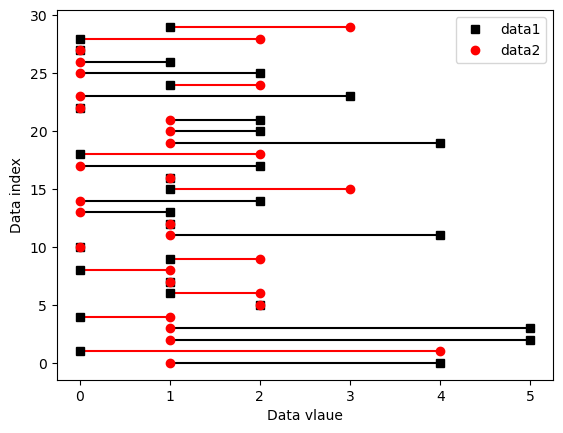

In [6]:
N = 30

data1 = np.random.poisson(1.5,N)
data2 = np.random.poisson(1,N)

colors = 'kr'
for i in range(N):
    plt.plot([data1[i], data2[i]],[i, i],colors[int(data1[i]<data2[i])])
    
plt.plot(data1,np.arange(N),'ks',markerfacecolor='k',label='data1')
plt.plot(data2,np.arange(N),'ro',markerfacecolor='r',label='data2')

plt.ylabel('Data index')
plt.xlabel('Data vlaue')
plt.legend()

plt.show()

In [8]:
t,p = stats.wilcoxon(data1,data2)
print('Wilcoxon z=%g, p=%g'%(t,p))


Wilcoxon z=99, p=0.23036


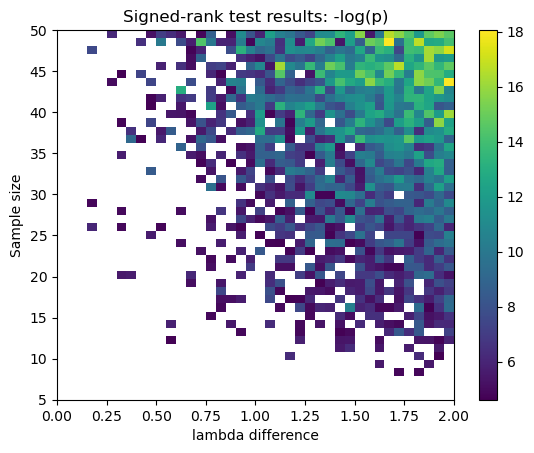

In [14]:
Ns = np.arange(5,51)
lambdas = np.linspace(1,3,40)

pvals = np.zeros((len(Ns),len(lambdas)))

for ni in range(len(Ns)):
    for li in range(len(lambdas)):
        
        data1 = np.random.poisson(lambdas[0], Ns[ni])
        data2 = np.random.poisson(lambdas[li], Ns[ni])

        t,p = stats.wilcoxon(data1,data2)
        
        pvals[ni,li] = -np.log(p)
        

pvalthresh = .01
pvals[pvals<-np.log(pvalthresh)] = np.NaN

plt.imshow(pvals,origin='lower',extent=[lambdas[0]-1,lambdas[-1]-1,Ns[0],Ns[-1]],aspect='auto')
plt.xlabel('lambda difference')
plt.ylabel('Sample size')
plt.colorbar()
plt.title('Signed-rank test results: -log(p)')
plt.show()